**Final Project**

**Corona Data visualization.**

1. Processing The Data
2. Plotting of Total Cases vs Total Recovered for India and USA
3. Comparison of Deaths.
4. Forcasting for Cases in INDIA 


**Corona Data visualization.**

1. Processing The Data

In [ ]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv('/content/sample_data/owid-covid-data.csv') #importing data
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244101,ZWE,Africa,Zimbabwe,2022-12-16,259356.0,0.0,0.000,5622.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
244102,ZWE,Africa,Zimbabwe,2022-12-17,259356.0,0.0,0.000,5622.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
244103,ZWE,Africa,Zimbabwe,2022-12-18,259356.0,0.0,0.000,5622.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
244104,ZWE,Africa,Zimbabwe,2022-12-19,259356.0,0.0,0.000,5622.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [ ]:
#Taking Required Number of Columns
df=df[['iso_code','location','date','total_cases','total_deaths','new_cases']]
df = df.rename(columns={'iso_code':'iso','date':'ds'})

In [ ]:
df.isnull().sum()
df=df.dropna() #dropping Null Values fron dataframe(df)

df['ds'] = pd.to_datetime(df['ds']) #

#Converting Columns  Values to int/str
df['iso']=df['iso'].apply(str)
df['total_cases'] = df['total_cases'].astype(int)
df['total_deaths'] = df['total_deaths'].astype(int)
df['new_cases'] = df['new_cases'].astype(int)
df

<ipython-input-3-97c600efec44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds']) #


,iso,location,ds,total_cases,total_deaths,new_cases
28,AFG,Afghanistan,2020-03-23,40,1,6
29,AFG,Afghanistan,2020-03-24,42,1,2
30,AFG,Afghanistan,2020-03-25,74,1,32
31,AFG,Afghanistan,2020-03-26,80,2,6
32,AFG,Afghanistan,2020-03-27,91,2,11
...,...,...,...,...,...,...
244101,ZWE,Zimbabwe,2022-12-16,259356,5622,0
244102,ZWE,Zimbabwe,2022-12-17,259356,5622,0
244103,ZWE,Zimbabwe,2022-12-18,259356,5622,0
244104,ZWE,Zimbabwe,2022-12-19,259356,5622,0


In [ ]:
df = df.set_index("iso")

In [ ]:
df

,location,ds,total_cases,total_deaths,new_cases
iso,,,,,
AFG,Afghanistan,2020-03-23,40,1,6
AFG,Afghanistan,2020-03-24,42,1,2
AFG,Afghanistan,2020-03-25,74,1,32
AFG,Afghanistan,2020-03-26,80,2,6
AFG,Afghanistan,2020-03-27,91,2,11
...,...,...,...,...,...
ZWE,Zimbabwe,2022-12-16,259356,5622,0
ZWE,Zimbabwe,2022-12-17,259356,5622,0
ZWE,Zimbabwe,2022-12-18,259356,5622,0


In [ ]:
#Dropping Unwanted Rows

df.drop(['OWID_WRL','OWID_AFR','OWID_SAM','OWID_OCE','OWID_NAM','OWID_EUN','OWID_EUR','OWID_ASI','OWID_INT','OWID_KOS'],axis=00,inplace=True)
#df.drop('OWID_AFR',inplace=True)

In [ ]:
df=df.reset_index()
df

,iso,location,ds,total_cases,total_deaths,new_cases
0,AFG,Afghanistan,2020-03-23,40,1,6
1,AFG,Afghanistan,2020-03-24,42,1,2
2,AFG,Afghanistan,2020-03-25,74,1,32
3,AFG,Afghanistan,2020-03-26,80,2,6
4,AFG,Afghanistan,2020-03-27,91,2,11
...,...,...,...,...,...,...
200033,ZWE,Zimbabwe,2022-12-16,259356,5622,0
200034,ZWE,Zimbabwe,2022-12-17,259356,5622,0
200035,ZWE,Zimbabwe,2022-12-18,259356,5622,0
200036,ZWE,Zimbabwe,2022-12-19,259356,5622,0


# **NOTE :** Below 2 Calculation are done because we don't have those columns we required to plot the graphs.

In [ ]:
#removing deaths and new cases from total cases (We got Cases which are alive or recovered) 
#I assume by below calculation will give us recovered Cases. 
 
df['total_recover'] = df['total_cases'] - df['total_deaths']- df['new_cases']
df

,iso,location,ds,total_cases,total_deaths,new_cases,total_recover
0,AFG,Afghanistan,2020-03-23,40,1,6,33
1,AFG,Afghanistan,2020-03-24,42,1,2,39
2,AFG,Afghanistan,2020-03-25,74,1,32,41
3,AFG,Afghanistan,2020-03-26,80,2,6,72
4,AFG,Afghanistan,2020-03-27,91,2,11,78
...,...,...,...,...,...,...,...
200033,ZWE,Zimbabwe,2022-12-16,259356,5622,0,253734
200034,ZWE,Zimbabwe,2022-12-17,259356,5622,0,253734
200035,ZWE,Zimbabwe,2022-12-18,259356,5622,0,253734
200036,ZWE,Zimbabwe,2022-12-19,259356,5622,0,253734


In [ ]:
#I assume by below calculation will give us Active Cases which is same as New Cases. 
df['active_cases'] = df['total_cases']- df['total_recover']-df['total_deaths'] 
df

,iso,location,ds,total_cases,total_deaths,new_cases,total_recover,active_cases
0,AFG,Afghanistan,2020-03-23,40,1,6,33,6
1,AFG,Afghanistan,2020-03-24,42,1,2,39,2
2,AFG,Afghanistan,2020-03-25,74,1,32,41,32
3,AFG,Afghanistan,2020-03-26,80,2,6,72,6
4,AFG,Afghanistan,2020-03-27,91,2,11,78,11
...,...,...,...,...,...,...,...,...
200033,ZWE,Zimbabwe,2022-12-16,259356,5622,0,253734,0
200034,ZWE,Zimbabwe,2022-12-17,259356,5622,0,253734,0
200035,ZWE,Zimbabwe,2022-12-18,259356,5622,0,253734,0
200036,ZWE,Zimbabwe,2022-12-19,259356,5622,0,253734,0


In [ ]:
# Getting Data of INDIA and USA in one Data frame
df_ind=df.loc[(df['iso'] == 'IND')]
df_usa=df.loc[(df['iso'] == 'USA')]
df_new = pd.concat([df_ind, df_usa])
df_new=df_new.reset_index()
df_new

,index,iso,location,ds,total_cases,total_deaths,new_cases,total_recover,active_cases
0,85426,IND,India,2020-03-11,62,1,6,55,6
1,85427,IND,India,2020-03-12,73,1,11,61,11
2,85428,IND,India,2020-03-13,82,2,9,71,9
3,85429,IND,India,2020-03-14,102,2,20,80,20
4,85430,IND,India,2020-03-15,113,2,11,100,11
...,...,...,...,...,...,...,...,...,...
2033,190899,USA,United States,2022-12-16,99881898,1087398,54269,98740231,54269
2034,190900,USA,United States,2022-12-17,99887614,1087410,5716,98794488,5716
2035,190901,USA,United States,2022-12-18,99892513,1087410,4899,98800204,4899
2036,190902,USA,United States,2022-12-19,99950486,1087672,57973,98804841,57973


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2038 entries, 0 to 2037
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          2038 non-null   int64         
 1   iso            2038 non-null   object        
 2   location       2038 non-null   object        
 3   ds             2038 non-null   datetime64[ns]
 4   total_cases    2038 non-null   int64         
 5   total_deaths   2038 non-null   int64         
 6   new_cases      2038 non-null   int64         
 7   total_recover  2038 non-null   int64         
 8   active_cases   2038 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 143.4+ KB


In [ ]:
def plot_var(var='total_recover',
             iso='IND'):

    assert type(var)==str
    assert type(iso)==str
 
    y = df_new[df_new['iso']==iso][var]
    x = df_new[df_new['iso']==iso]['ds']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,iso),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

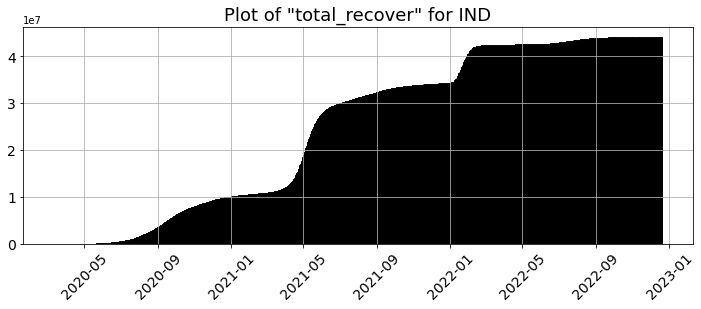

In [ ]:
#Plotting of Total Cases for INDIA using Bar Graph
plot_var()

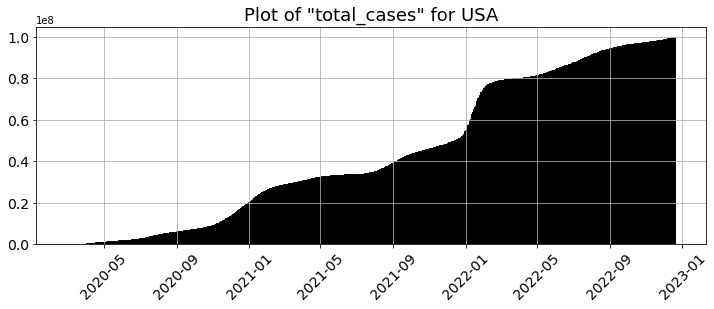

In [ ]:
#Plotting of Total Cases for USA using Bar Graph
plot_var('total_cases','USA')

**Corona Data visualization.**

2. Plotting of Total Cases vs Total Recovered for India and USA

In [ ]:
#Plotting of Total Cases vs Total Recovered for India and USA using Scatter Plot
def plot_xy(varx='active_cases',
            vary='total_recover',
            iso='IND',
            iso1='USA'):
   
    assert type(varx)==str
    assert type(vary)==str 
    
    x = df_new[df_new['iso']==iso][varx]
    y = df_new[df_new['iso']==iso][vary]
    x1 = df_new[df_new['iso']==iso1][varx]
    y1 = df_new[df_new['iso']==iso1][vary]
    
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(15,5))
        plt.title("Plot of Active Cases vs Total Recovered for India and USA ",fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='lightgreen',s=100)
        plt.scatter(x=x1,y=y1,edgecolor='b',color='r',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.xlabel("Active Cases",fontsize=16)
        plt.ylabel("Total Recovered",fontsize=16)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

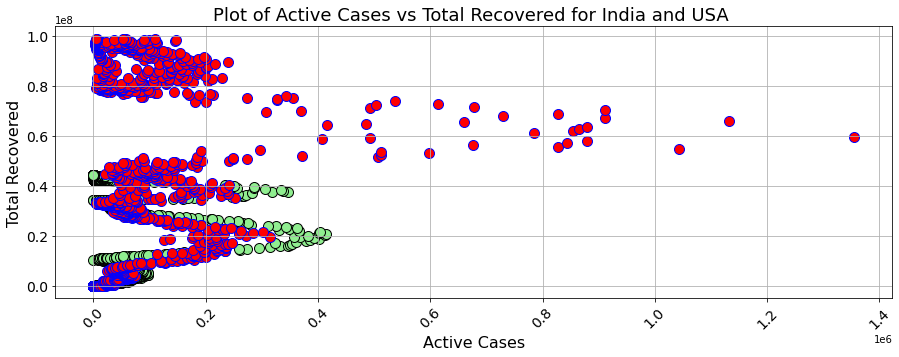

In [ ]:
plot_xy(iso='IND',iso1='USA')

In [ ]:
#Plotting of Total Recovered Result for India and USA using Line Plot
def plotTesting(iso=['IND','USA']):
    
    legends = []
    plt.figure(figsize=(14,5))
    plt.title("Total Recovered results",fontsize=18)
    for s in iso:
        data = np.array(df_new[df_new['iso']==s]['total_recover'])[-1::-1]
        slope = int((data[-1]-data[0])/len(data))
        plt.plot(data,linewidth=2)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" recovered/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.show()

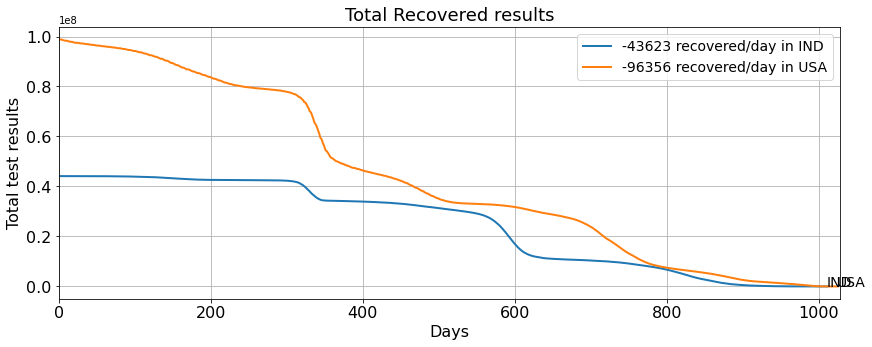

In [ ]:
plotTesting()

In [ ]:
#Plotting of Total Cases vs Total Recovered for India and USA using Line Plot
def plot(iso=['IND','USA']):
    
    legends = []
    plt.figure(figsize=(14,5))
    plt.title("Active Cases vs Total Recovered",fontsize=18)
    for s in iso:
        data = np.array(df_new[df_new['iso']==s]['total_recover'])[-1::-1]      
        slope = int((data[-1]-data[0])/len(data))        
        plt.plot(data,linewidth=2)        
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" recovered/day in " + s)

    for s1 in iso:    
        data1 = np.array(df_new[df_new['iso']==s1]['active_cases'])[-1::-1]
        slope1 = int((data1[-1]-data1[0])/len(data1))
        plt.plot(data1,linewidth=2)
        plt.text(x=len(data1)-2,y=data1[-1]*1.05,s=s1,fontsize=14)
        legends.append(str(slope1)+" cases/day in " + s1)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xlim(0,len(data1)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total cases vs Total Recovered",fontsize=16)
    plt.show()

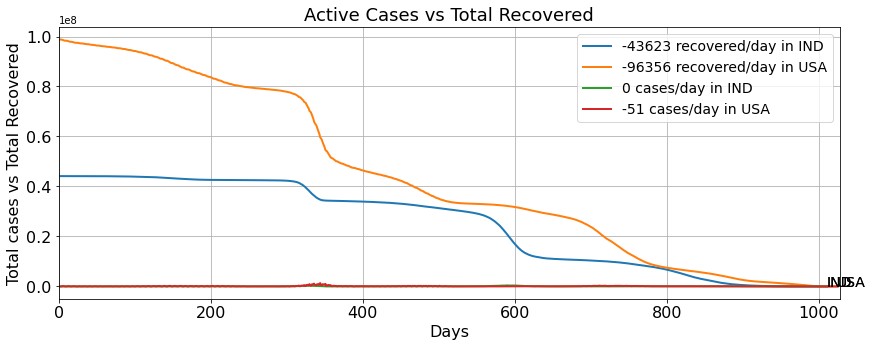

In [ ]:
plot()

Corona Data visualization.

3. Comparison of Deaths in all the locations. 

Text(0, 0.5, 'Total Deaths')

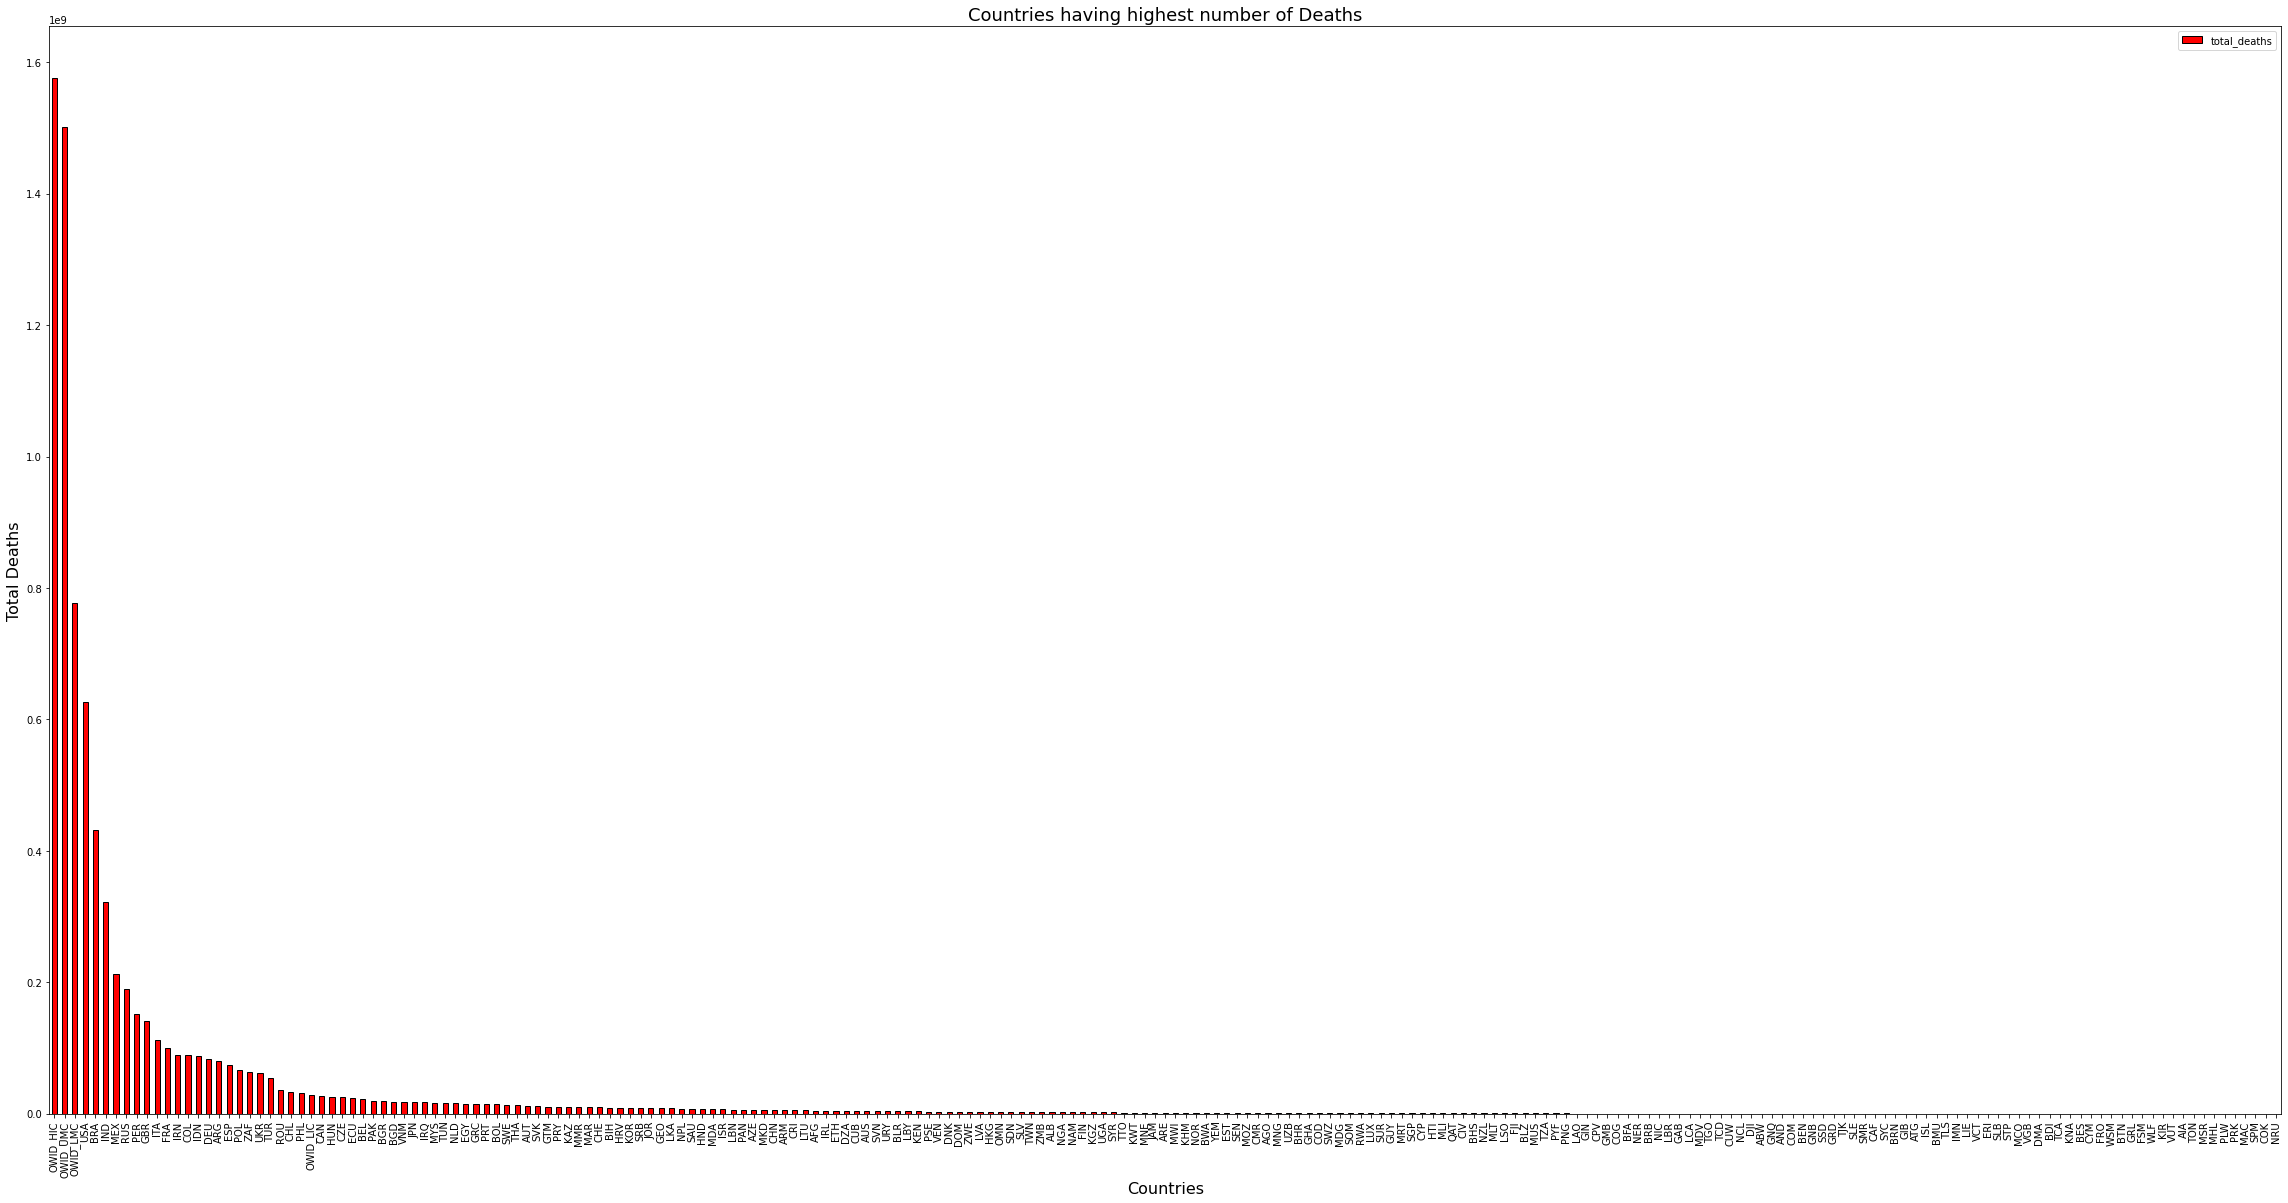

In [ ]:
#TOTAL Countries with Worst Death Counts.
import numpy as np
import matplotlib.pyplot as plt

plot_data = df[['iso','total_deaths']]
plot_data =plot_data.groupby('iso').sum()

plot_data.sort_values(by='total_deaths',
                      axis=0,
                      ascending=False,
                      inplace=False,
                      kind='quicksort',
                      na_position='last').plot(kind='bar',color='r',edgecolor='black',figsize=(40,20))
plt.title("Countries having highest number of Deaths",fontsize=18)                    
plt.xlabel("Countries",fontsize=16)
plt.ylabel("Total Deaths",fontsize=16)

Text(0, 0.5, 'Total Deaths')

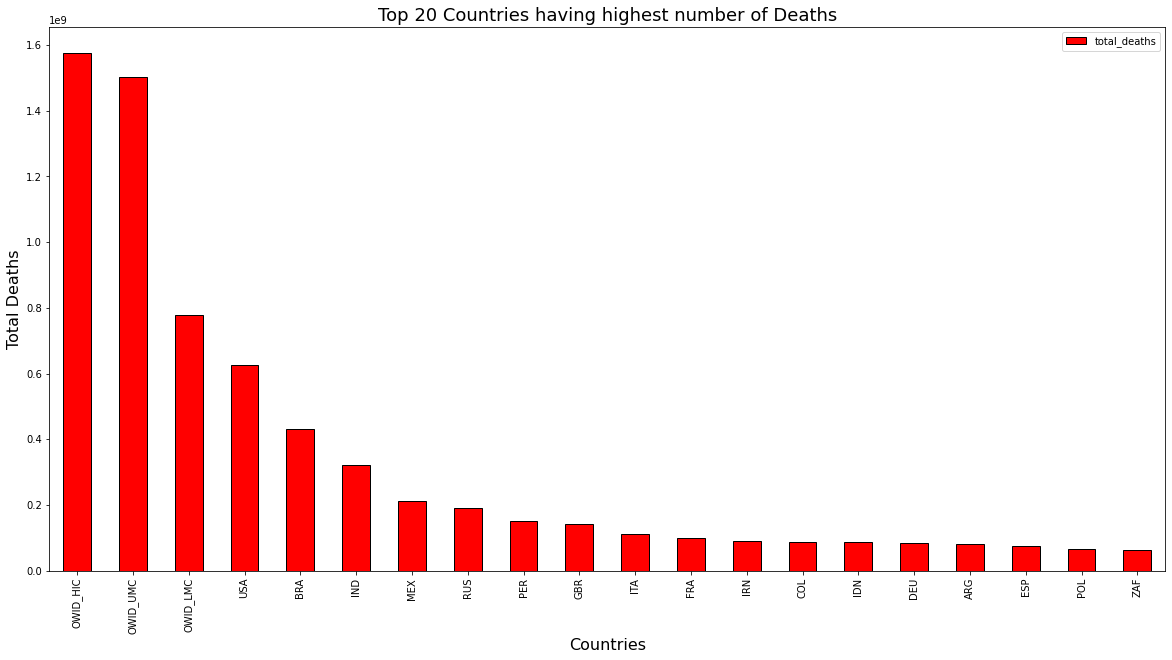

In [ ]:
#TOP 20 Countries with Worst Death Counts.
test=plot_data.sort_values(by='total_deaths',
                      axis=0,
                      ascending=False,
                      inplace=False,
                      kind='quicksort',
                      na_position='last')
test.nlargest(20,'total_deaths').plot(kind='bar',color='r', edgecolor='black',figsize=(20,10))
plt.title("Top 20 Countries having highest number of Deaths",fontsize=18)
plt.xlabel("Countries",fontsize=16)
plt.ylabel("Total Deaths",fontsize=16)

Text(0, 0.5, 'Total Deaths')

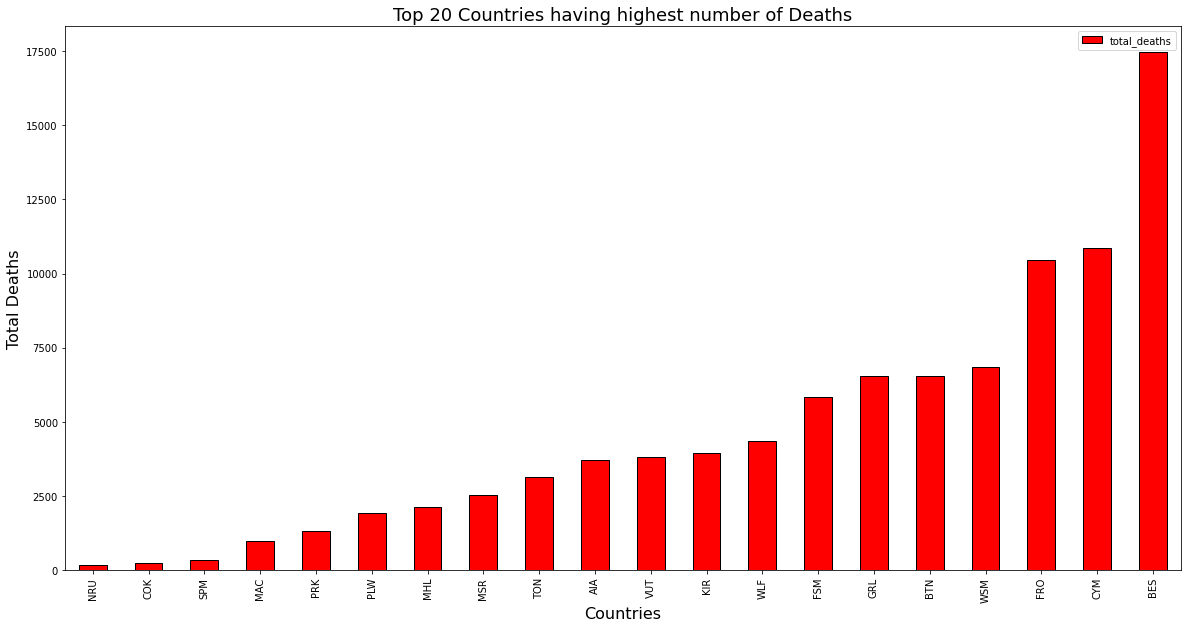

In [ ]:
#TOP 20 Countries with Less Death Counts.
test=plot_data.sort_values(by='total_deaths',
                      axis=0,
                      ascending=False,
                      inplace=False,
                      kind='quicksort',
                      na_position='last')
test.nsmallest(20,'total_deaths').plot(kind='bar',color='r', edgecolor='black',figsize=(20,10))
plt.title("Top 20 Countries having highest number of Deaths",fontsize=18)
plt.xlabel("Countries",fontsize=16)
plt.ylabel("Total Deaths",fontsize=16)

In [ ]:
#Finding Country/state having highest/Lowest number of Deaths.
d = df[['location','total_deaths']]
d =d.groupby('location').sum().sort_values(by='total_deaths',
                      axis=0,
                      ascending=False,
                      inplace=False,
                      kind='quicksort',
                      na_position='last')

#Country/state having highest number of Deaths.

In [ ]:
#Country/state having highest number of Deaths.
hd=d.nlargest(1,'total_deaths')#.plot(kind='bar',color='r', edgecolor='black',figsize=(7,5))
hd=hd.reset_index()
print('Country/state having highest number of deaths is :')
hd

Country/state having highest number of deaths is :


,location,total_deaths
0,High income,1575700561


In [ ]:
fig1 = px.scatter(hd, x = 'location', y = 'total_deaths', size = 'total_deaths', size_max = 50,
                color = hd.index, title = 'highest number of Deaths Countries')
fig1.show()

## Country/state having Lowest number of Deaths.

In [ ]:
#Country/state having Lowest number of Deaths.
ld=d.nsmallest(1,'total_deaths')
ld=ld.reset_index()
print('Country/state having Lowest number of cases is :')
ld


Country/state having Lowest number of cases is :


,location,total_deaths
0,Nauru,172


In [ ]:
fig1 = px.scatter(ld, x = 'location', y = 'total_deaths', size = 'total_deaths', size_max = 50,
                color = ld.index, title = 'Lowest number of Deaths Countries')
fig1.show()

# Country/state having highest number of cases.

In [ ]:
c= df[['location','total_cases']]
c =c.groupby('location').sum().sort_values(by='total_cases',
                      axis=0,
                      ascending=False,
                      inplace=False,
                      kind='quicksort',
                      na_position='last')


In [ ]:
#Country/state having highest number of Cases.
hc=c.nlargest(1,'total_cases')
hc=hc.reset_index()
print('Country/state having highest number of cases is :')
hc


Country/state having highest number of cases is :


,location,total_cases
0,High income,146463039742


In [ ]:
fig1 = px.scatter(hc, x = 'location', y = 'total_cases', size = 'total_cases', size_max = 50,
                color = hc.index, title = 'highest number of Cases Countries')
fig1.show()

# Country/state having Lowest number of Cases.

In [ ]:
#Country/state having Lowest number of Cases.
lc=c.nsmallest(1,'total_cases')
lc=lc.reset_index()
print('Country/state having Lowest number of cases is :')
lc


Country/state having Lowest number of cases is :


,location,total_cases
0,North Korea,221


In [ ]:
fig1 = px.scatter(lc, x = 'location', y = 'total_cases', size = 'total_cases', size_max = 50,
                color = lc.index, title = 'Lowest number of Cases Countries')
fig1.show()

**Corona Data visualization.**
4. FORCASTING INDIA for Total numbar of Cases

In [ ]:
#Creating Data frame for forcasting
df_indf = df_ind[['ds','active_cases']]
df_indf = df_indf.rename(columns={'active_cases':'y'})
df_indf

,ds,y
85426,2020-03-11,6
85427,2020-03-12,11
85428,2020-03-13,9
85429,2020-03-14,20
85430,2020-03-15,11
...,...,...
86433,2022-12-16,167
86434,2022-12-17,176
86435,2022-12-18,135
86436,2022-12-19,112


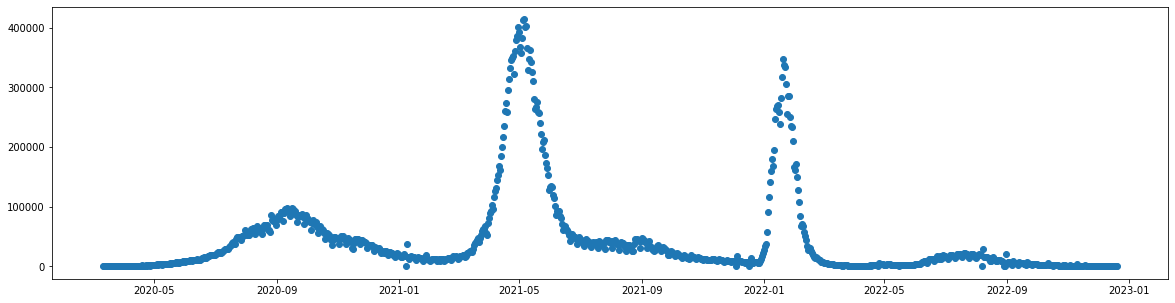

In [ ]:
#forcasting
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(df_indf['ds'],df_indf['y'])
plt.show()

In [ ]:
!conda install -c conda-forge fbprophet -y

/bin/bash: conda: command not found


In [ ]:
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [ ]:
#using Prophet for Predicting
model = Prophet(changepoint_prior_scale=1)
# Overfit,Underfit and Bestfit
model.fit(df_indf)
forecast = model.make_future_dataframe(periods=1,freq='M')
forecast = model.predict(forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ai3hqaf/i697jl4s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ai3hqaf/cxdm8co3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59187', 'data', 'file=/tmp/tmp1ai3hqaf/i697jl4s.json', 'init=/tmp/tmp1ai3hqaf/cxdm8co3.json', 'output', 'file=/tmp/tmp1ai3hqaf/prophet_model3qwwv_mb/prophet_model-20221221125258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:52:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:53:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-11,13240.908941,1665.734048,23911.368680
1,2020-03-12,11080.370156,-331.168895,21850.290404
2,2020-03-13,8826.342872,-2367.436322,19661.292748
3,2020-03-14,6802.988165,-4526.876134,18829.372384
4,2020-03-15,2641.035162,-8533.510584,14126.260161
...,...,...,...,...
1008,2022-12-17,-6268.393520,-17443.085573,4355.561547
1009,2022-12-18,-9931.622870,-20677.607571,1813.654680
1010,2022-12-19,-16182.144568,-27041.968914,-4801.260009
1011,2022-12-20,-12245.331734,-23982.856978,-1031.438089


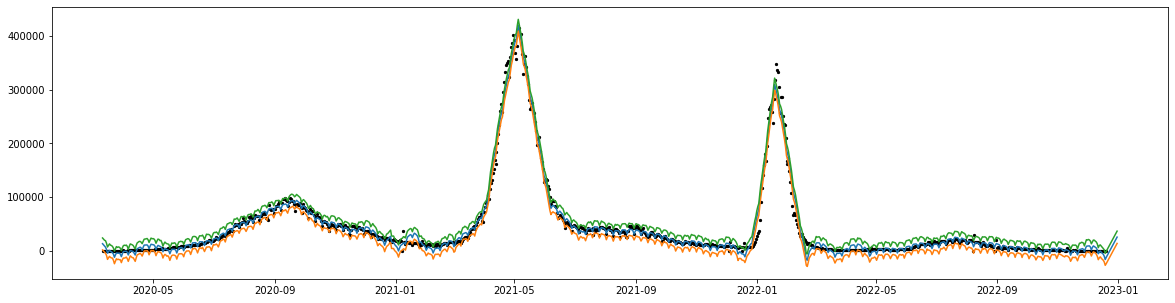

In [ ]:
#Plotting the DATA
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(df_indf['ds'],df_indf['y'],s=5,c='k')
plt.plot(forecast['ds'],forecast['yhat'])
plt.plot(forecast['ds'],forecast['yhat_lower'])
plt.plot(forecast['ds'],forecast['yhat_upper'])
plt.show()

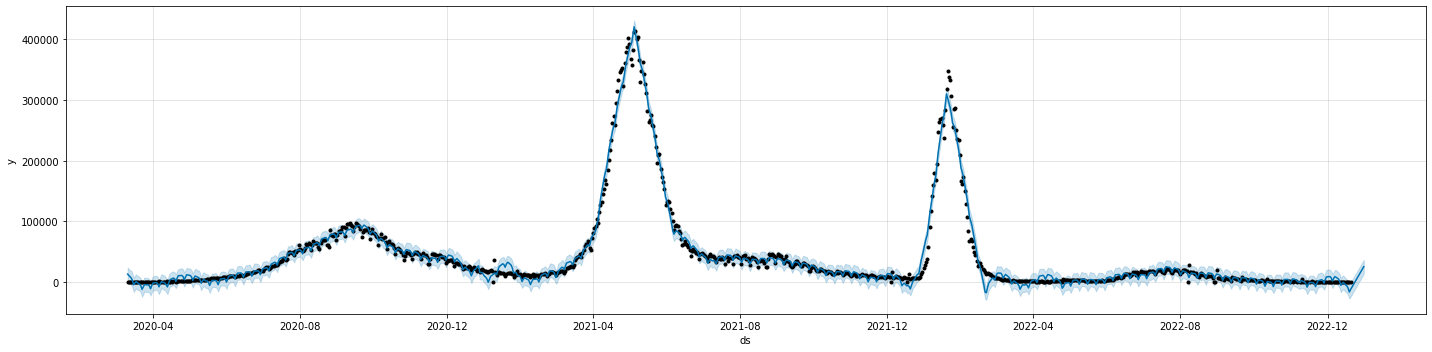

In [ ]:

model.plot(forecast,figsize=(20,5));